In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

IndexError: index 6 is out of bounds for axis 0 with size 6

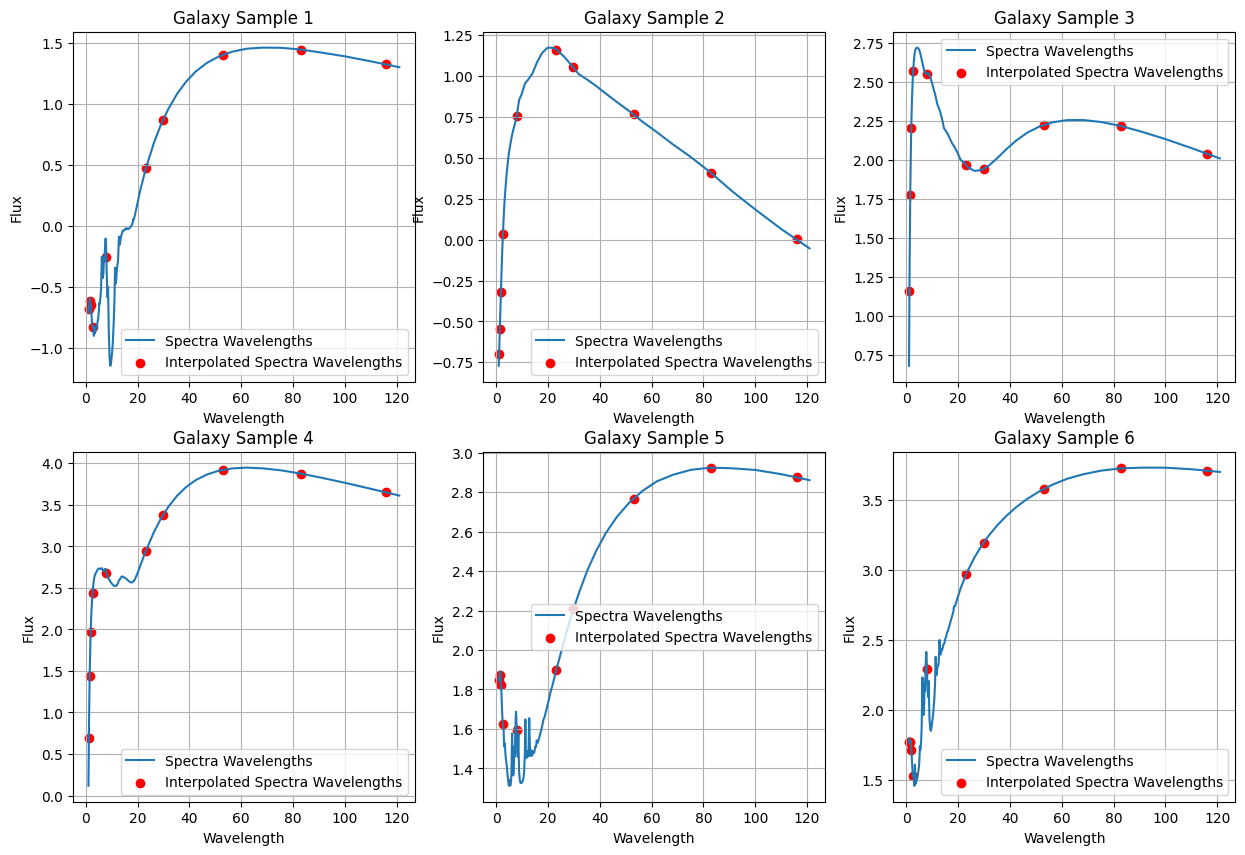

In [51]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load the CSV files
spectra_file = "./data/spectra.csv"
interpolated_spectra_file = "./data/interpolated_spectra.csv"

# Read the data
spectra = pd.read_csv(spectra_file, header=None)
interpolated_spectra = pd.read_csv(interpolated_spectra_file, header=None)

# Extract the wavelengths from the first row and remove it
wavelengths_spectra = spectra.iloc[0, :].values
wavelengths_interpolated = interpolated_spectra.iloc[0, :].values
spectra = spectra.iloc[1:, :].reset_index(drop=True)
interpolated_spectra = interpolated_spectra.iloc[1:, :].reset_index(drop=True)

# Keep only the values where wavelengths_spectra > 5 and < 35
mask_spectra = (wavelengths_spectra > 1) & (wavelengths_spectra < 125)
filtered_wavelengths_spectra = wavelengths_spectra[mask_spectra]
filtered_spectra = spectra.iloc[:, mask_spectra]

# Similarly, filter interpolated_spectra
mask_interpolated = (wavelengths_interpolated > 1) & (wavelengths_interpolated < 125)
filtered_wavelengths_interpolated = wavelengths_interpolated[mask_interpolated]
filtered_interpolated_spectra = interpolated_spectra.iloc[:, mask_interpolated]

# Ensure all flux values are positive in both datasets
positive_flux_mask_spectra = (filtered_spectra > 0).all(axis=1)
filtered_spectra = filtered_spectra[positive_flux_mask_spectra].reset_index(drop=True)

positive_flux_mask_interpolated = (filtered_interpolated_spectra > 0).all(axis=1)
filtered_interpolated_spectra = filtered_interpolated_spectra[positive_flux_mask_interpolated].reset_index(drop=True)

# Reshape the filtered data
spectra_reshaped = filtered_spectra.T.values.reshape(len(filtered_wavelengths_spectra), -1)
interpolated_spectra_reshaped = filtered_interpolated_spectra.T.values.reshape(len(filtered_wavelengths_interpolated), -1)

# Define the number of subplots (rows and columns)
num_plots = min(5, spectra_reshaped.shape[1])  # Ensure we don't exceed the number of samples
rows = 2  # Define the number of rows
cols = (num_plots + 1) // rows  # Compute the number of columns dynamically

# Create the figure and subplots
fig, axes = plt.subplots(rows, cols, figsize=(15, 10))  # Adjust size as needed
axes = axes.flatten()  # Flatten the axes array for easy iteration

for i in range(7):
    ax = axes[i]
    ax.plot(filtered_wavelengths_spectra, np.log10(spectra_reshaped[:, i]), label='Spectra Wavelengths')
    # Uncomment the below if you want to include interpolated data
    ax.scatter(filtered_wavelengths_interpolated, np.log10(interpolated_spectra_reshaped[:, i]),
               label='Interpolated Spectra Wavelengths', c='r')
    ax.set_xlabel('Wavelength')
    ax.set_ylabel('Flux')
    ax.set_title(f'Galaxy Sample {i+1}')
    ax.legend()
    ax.grid(True)

# Remove any empty subplots (if num_plots < rows * cols)
for j in range(num_plots, len(axes)):
    fig.delaxes(axes[j])

# Adjust layout and show the figure
plt.tight_layout()
plt.show()


In [28]:
def plot_data(output_wave_list, output_flux_list, wave_interpol, photometry):
    # Filter wavelengths and corresponding flux values
    mask = 5 < output_wave_list < 35
    filtered_wave_list = output_wave_list[mask]
    filtered_flux_list = output_flux_list[mask, :]
    
    # Define the number of rows and columns for the subplots
    n_rows = 2
    n_cols = 3

    # Create the figure and axes
    fig, axs = plt.subplots(n_rows, n_cols, figsize=(15, 10))
    axs = axs.ravel()  # Flatten the 2D array of axes for easier indexing

    # Plot data in subplots
    plot_index = 0
    for i in range(filtered_flux_list.shape[1]):  # Iterate over columns
        if i % 1250 == 0 and plot_index < len(axs):  # Ensure not exceeding subplot count
            ax = axs[plot_index]
            
            ax.plot(filtered_wave_list, filtered_flux_list[:, i], zorder=1)
            ax.scatter(wave_interpol, photometry[:, i], c='red', zorder=2)
            ax.legend(['Simulated Spectra', 'Photometry'])
            ax.set_xlabel('Wavelength (µm)')
            ax.set_ylabel('Flux')
            ax.set_title(f'Galaxy {plot_index + 1}')
            ax.grid(True)
            plot_index += 1

    # Hide any unused subplots
    for j in range(plot_index, len(axs)):
        axs[j].axis('off')

    # Adjust layout and save the figure
    plt.tight_layout()
    plt.savefig('synth_6_plots_filtered.png', dpi=300, bbox_inches='tight')
    plt.show()


In [29]:
spectra = pd.read_csv('./data/spectra.csv').T
spectra.reset_index(inplace=True)
spectra.columns = range(len(spectra.columns))
spectra = spectra.values.astype(np.float64)
spectra_flux = np.log(spectra[:,1:])
spectra_wave = spectra[:,0]

photo = pd.read_csv('./data/interpolated_spectra.csv').T
photo.reset_index(inplace=True)
photo.columns = range(len(photo.columns))
photo = photo.values.astype(np.float64)
photo_flux = np.log(photo[:,1:])
photo_wave = photo[:,0]
print(photo_flux.shape, photo_wave.shape)
# for data_spectra in spectra_flux:
print(spectra_flux.shape)
    # if data_spectra < 200:
plot_data(spectra_wave, spectra_flux, photo_wave, photo_flux)

(17, 10000) (17,)
(206, 10000)


ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()